In [38]:
import pandas as pd
import numpy as np

In [39]:
import seaborn as sns  
import matplotlib.pyplot as plt

# might be needed depending on your version of Jupyter
%matplotlib inline

In [40]:
df = pd.read_csv('../Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdN2.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79392 entries, 0 to 79391
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UWI         79392 non-null  object
 1   START_DATE  79392 non-null  object
 2   OIL         79392 non-null  int64 
 3   GAS         79392 non-null  int64 
 4   WATER       79392 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.0+ MB


In [67]:
df.isnull().sum()

UWI           0
START_DATE    0
OIL           0
GAS           0
WATER         0
dtype: int64

In [68]:
df.head()

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0


In [69]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0
...,...,...,...,...,...
79387,RK103,2018-06-01,39467,44068,0
79388,TR855,2018-06-01,38581,44513,31049
79389,BR477,2018-06-01,5740,4052,434
79390,RK301,2018-06-01,0,0,0


In [70]:
df.corr()['OIL'].sort_values()

WATER   -0.077144
GAS      0.959902
OIL      1.000000
Name: OIL, dtype: float64

In [71]:
df.corr()['GAS'].sort_values()

WATER   -0.049226
OIL      0.959902
GAS      1.000000
Name: GAS, dtype: float64

In [72]:
df.corr()['WATER'].sort_values()

OIL     -0.077144
GAS     -0.049226
WATER    1.000000
Name: WATER, dtype: float64

In [73]:
df.corr()

,OIL,GAS,WATER
OIL,1.000000,0.959902,-0.077144
GAS,0.959902,1.000000,-0.049226
WATER,-0.077144,-0.049226,1.000000


In [74]:
from datetime import datetime
import statsmodels.api as sm

In [75]:
#df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [76]:
#df['START_DATE']=df['START_DATE'].apply(pd.to_datetime)

In [77]:
df['YEAR'] = df['START_DATE'].apply(lambda START_DATE:int(START_DATE[:-6]))

In [78]:
df = df.drop('START_DATE',axis=1)

In [79]:
df['YEAR']

0        1965
1        1973
2        1973
3        1973
4        1973
         ... 
79387    2018
79388    2018
79389    2018
79390    2018
79391    2018
Name: YEAR, Length: 79392, dtype: int64

In [80]:
X=df['YEAR']
Y=df['OIL']

In [81]:
X

0        1965
1        1973
2        1973
3        1973
4        1973
         ... 
79387    2018
79388    2018
79389    2018
79390    2018
79391    2018
Name: YEAR, Length: 79392, dtype: int64

In [82]:
Y

0          1785
1         26550
2        122600
3         65134
4         61277
          ...  
79387     39467
79388     38581
79389      5740
79390         0
79391         0
Name: OIL, Length: 79392, dtype: int64

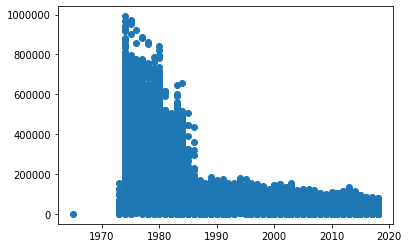

In [83]:
#plt.plot(figsize=(12,8))
plt.scatter(X,Y);
#plt.xlim([80,15])

In [84]:
from scipy import stats
import statsmodels.api as sm

In [85]:
X1=sm.add_constant(X)
reg=sm.OLS(Y,X1).fit()

In [86]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OIL   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                 2.165e+04
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:39:59   Log-Likelihood:            -9.9537e+05
No. Observations:               79392   AIC:                         1.991e+06
Df Residuals:                   79390   BIC:                         1.991e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.374e+06    4.3e+04    148.402      0.000    6.29e+06    6.46e+06
YEAR       -3156.3669     21.451   -147.143      0.000   -3198.411   -3114.323
==============================================================================
Omnibus:                    72619.042   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3165741.013
Skew:                           4.403   Prob(JB):                         0.00
Kurtosis:                      32.656   Cond. No.                     3.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
slope, intercept, r_value, p_value, std_err=stats.linregress(X,Y)

In [88]:
slope

-3156.366924680268

In [89]:
intercept

6374116.107178445

In [90]:
r_value

-0.4629041927437519

In [91]:
pow(r_value,2)

0.2142802916597446

In [92]:
p_value

0.0

In [93]:
std_err

21.45098759824611